In [1]:
import qiskit
from qiskit import QuantumCircuit, execute, Aer
from qiskit.visualization import plot_histogram, plot_bloch_multivector

In [2]:
def init(n):
    circuit = QuantumCircuit(n + 1) # initial state = [0>
    for i in range(n):
        circuit.h(i)
    circuit.x(n)
    circuit.h(n)    # n+1 번째 qubit는 우리가 찾는 good_state로 가정 [1>
    return circuit  # n = # of qubit, thus N = 2^n = 8

In [3]:
def oracle(n, x):
    circuit = QuantumCircuit(n + 1)
    for i in range(n):
        if x & (1 << i) == 0:
            circuit.x(i)
    if n == 2:
        circuit.ccx(0, 1, 2)
 
    for i in range(n):
        if x & (1 << i) == 0:
            circuit.x(i)
    return circuit

In [17]:
oracle(2,1)

In [4]:
def diffusion(n, x):
    circuit = QuantumCircuit(n+1)
    for i in range(n):
        circuit.h(i)
        circuit.x(i)  # h x
    circuit.h(n)
    if n == 2:
        circuit.h(1)
        circuit.cx(0,1)
        circuit.h(1)
    for i in range(n):
        circuit.x(i)
        circuit.h(i)  # x h 대칭 구조
    return circuit

In [19]:
n = 2
x = 2
circuit = QuantumCircuit(3, 2)
circuit &= init(n)
circuit.barrier()
circuit &= oracle(n, x)
circuit.barrier()
circuit &= diffusion(n, x)
circuit.barrier()
bits = [ i for i in range(n)]
circuit.measure(bits, bits)
circuit.draw()

┌───┐      ░ ┌───┐     ┌───┐ ░ ┌───┐┌───┐          ┌───┐┌───┐      ░ ┌─┐»
q_0: ┤ H ├──────░─┤ X ├──■──┤ X ├─░─┤ H ├┤ X ├───────■──┤ X ├┤ H ├──────░─┤M├»
     ├───┤      ░ └───┘  │  └───┘ ░ ├───┤├───┤┌───┐┌─┴─┐├───┤├───┤┌───┐ ░ └╥┘»
q_1: ┤ H ├──────░────────■────────░─┤ H ├┤ X ├┤ H ├┤ X ├┤ H ├┤ X ├┤ H ├─░──╫─»
     ├───┤┌───┐ ░      ┌─┴─┐      ░ ├───┤└───┘└───┘└───┘└───┘└───┘└───┘ ░  ║ »
q_2: ┤ X ├┤ H ├─░──────┤ X ├──────░─┤ H ├───────────────────────────────░──╫─»
     └───┘└───┘ ░      └───┘      ░ └───┘                               ░  ║ »
c: 2/══════════════════════════════════════════════════════════════════════╩═»
                                                                           0 »
«        
«q_0: ───
«     ┌─┐
«q_1: ┤M├
«     └╥┘
«q_2: ─╫─
«      ║ 
«c: 2/═╩═
«      1

{'11': 1024}


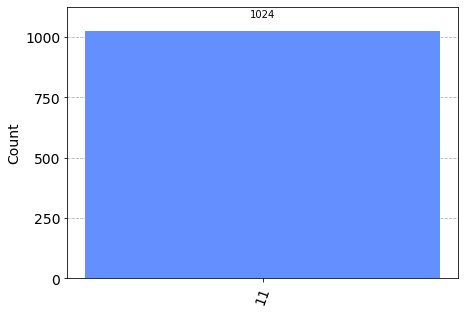

In [66]:
backend = Aer.get_backend('qasm_simulator')
result = execute(circuit, backend).result()
counts = result.get_counts()
print(counts)
plot_histogram(counts)